<a href="https://colab.research.google.com/github/Ajasahmed3182/DM_Programming-Assignment/blob/main/Pedda_Shali_DM_1_programing_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import os
import numpy as np
import pandas as pd
import warnings

from PIL import Image
from skimage.color import rgb2gray
import xml.etree.ElementTree as ET
from skimage import io, exposure, filters

In [10]:
warnings.filterwarnings("ignore")

In [12]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

In [28]:
image_dir = "/content/drive/MyDrive/data_mining/Pedda Shali Images"
annotation_dir = "/content/drive/MyDrive/data_mining/Pedda Shali Annotations"


In [29]:
class_names = ['Borzoi', 'Doberman', 'Komondor', 'Brittany_spaniel']

In [30]:
class_paths = ['n02107142-Doberman','n02090622-borzoi','n02105505-komondor','n02101388-Brittany_spaniel']

In [32]:
new_dir = "/content/drive/MyDrive/data_mining/processed"

## 2. Edge histogram Data

In [33]:
df = pd.DataFrame(columns = list(range(0,36))+['class'])
for class_ in class_paths:
  class_path = os.path.join(new_dir,class_)
  for filename in os.listdir(class_path):
    img = io.imread(os.path.join(class_path,filename))
    gray_sacle = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_sacle),
                    filters.sobel_v(gray_sacle))
    hist,bins = exposure.histogram(angle_sobel,nbins=36)
    for i in class_names:
      if i.lower() in class_.lower():
        break
    df.loc[len(df)] = list(hist)+[class_names.index(i)]




In [34]:
df.to_csv("/content/drive/MyDrive/data_mining/edge_data.csv")

## 3 Split into Test Train

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = np.array(df[df.columns[:-1]])
y = np.array(df['class'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## 4, 5 Standardization

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [40]:
scalled_x_train = scaler.transform(X_train)
scalled_x_test = scaler.transform(X_test)

## 6 KNN K-fold

In [41]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [42]:
mean_val_errors_std = []
mean_val_errors_strat = []
mean_train_errors_std = []
mean_train_errors_strat = []
k_values = [1, 3, 5, 7, 10, 20]
for k in k_values:
    # Standard 5-fold cross-validation
    kf = KFold(n_splits=5)
    knn = KNeighborsClassifier(n_neighbors=k)
    val_scores_std = cross_val_score(knn, scalled_x_train, y_train, cv=kf)
    train_scores_std = knn.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_std.append(1 - np.mean(val_scores_std))
    mean_train_errors_std.append(1 - train_scores_std)
    print(f"Standard 5-fold CV, k={k}: Train accuracy: {train_scores_std},Val accuracy: {np.mean(val_scores_std)}")

    skf = StratifiedKFold(n_splits=5)
    val_scores_strat = cross_val_score(knn, scalled_x_train, y_train, cv=skf)
    train_scores_strat = knn.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_val_errors_strat.append(1 - np.mean(val_scores_strat))
    mean_train_errors_strat.append(1 - train_scores_strat)
    print(f"Stratified 5-fold CV, k={k}: Train accuracy: {train_scores_strat},Val accuracy {np.mean(val_scores_strat)}")


Standard 5-fold CV, k=1: Train accuracy: 0.9855670103092784,Val accuracy: 0.29278350515463913
Stratified 5-fold CV, k=1: Train accuracy: 0.9855670103092784,Val accuracy 0.28865979381443296
Standard 5-fold CV, k=3: Train accuracy: 0.5835051546391753,Val accuracy: 0.25567010309278354
Stratified 5-fold CV, k=3: Train accuracy: 0.5835051546391753,Val accuracy 0.25567010309278354
Standard 5-fold CV, k=5: Train accuracy: 0.5154639175257731,Val accuracy: 0.29072164948453605
Stratified 5-fold CV, k=5: Train accuracy: 0.5154639175257731,Val accuracy 0.2721649484536083
Standard 5-fold CV, k=7: Train accuracy: 0.47010309278350515,Val accuracy: 0.23711340206185566
Stratified 5-fold CV, k=7: Train accuracy: 0.47010309278350515,Val accuracy 0.22474226804123712
Standard 5-fold CV, k=10: Train accuracy: 0.41030927835051545,Val accuracy: 0.24329896907216497
Stratified 5-fold CV, k=10: Train accuracy: 0.41030927835051545,Val accuracy 0.24948453608247423
Standard 5-fold CV, k=20: Train accuracy: 0.397938

In [43]:
import matplotlib.pyplot as plt

## 6 a

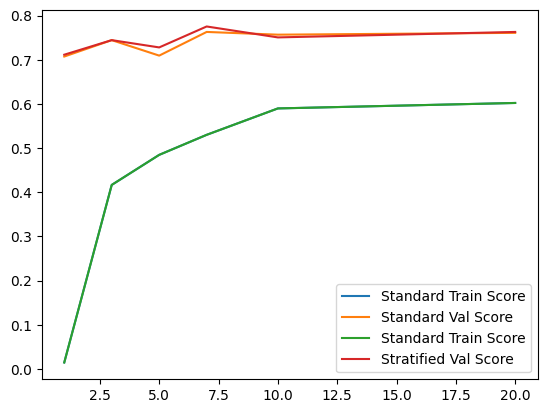

In [44]:
fig,ax = plt.subplots()
ax.plot(k_values,mean_train_errors_std,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_std,label="Standard Val Score")
ax.plot(k_values,mean_train_errors_strat,label="Standard Train Score")
ax.plot(k_values,mean_val_errors_strat,label="Stratified Val Score")
ax.legend()
plt.show()

In [45]:
print(f"Lowest Standrad Training mean Error is {np.min(mean_train_errors_std)} at  k =  {k_values[np.argmin(mean_train_errors_std)]}")
print(f"Lowest Standrad Val mean Error is {np.min(mean_val_errors_std)}  at  k = {k_values[np.argmin(mean_val_errors_std)]}")
print(f"Lowest Stratified Training mean Error is {np.min(mean_train_errors_strat)} at k = {k_values[np.argmin(mean_train_errors_strat)]}")
print(f"Lowest Stratified Val mean Error is {np.min(mean_val_errors_strat)} at k = {k_values[np.argmin(mean_val_errors_strat)]}")

Lowest Standrad Training mean Error is 0.014432989690721598 at  k =  1
Lowest Standrad Val mean Error is 0.7072164948453609  at  k = 1
Lowest Stratified Training mean Error is 0.014432989690721598 at k = 1
Lowest Stratified Val mean Error is 0.711340206185567 at k = 1


Overfiting at K =1 as Train error is low and val error is high.

## 6 b

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(scalled_x_train,y_train)

In [47]:
error = 1- knn.score(scalled_x_test,y_test)

In [48]:
error

0.6475409836065573

As Stratified Val error is lowest at k + 20

Test Score = 0.6475409836065573

## 7 Performance Comparison

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
def train_clf_to_get_confusion_matrix(clf,X,y):
  cm_list = []
  val_accs = []
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  for fold, (start_train_index, val_index) in enumerate(skf.split(X, y)):
    X_start_train, X_val = X[start_train_index], X[val_index]
    y_start_train, y_val = y[start_train_index], y[val_index]
    clf.fit(X_start_train, y_start_train)
    y_pred = clf.predict(X_val)
    val_acc= accuracy_score(y_val,y_pred)
    val_accs.append(val_acc)
    cm = confusion_matrix(y_val, y_pred, labels=np.unique(y))
    cm_list.append(cm)
  return cm_list,val_accs


In [64]:
def plot_confusion_matrix(cm_list,name,class_names):
  fig, axes = plt.subplots(1, 5, figsize=(20,4))
  for ind, cm in enumerate(cm_list):
    im = axes[ind].imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)

    axes[ind].set_xticks(np.arange(len(class_names)))
    axes[ind].set_yticks(np.arange(len(class_names)))
    axes[ind].set_xticklabels(class_names,rotation=45)
    if ind==0:
      axes[ind].set_yticklabels(class_names)
    axes[ind].set_title(f'Fold {ind+1}')


    for i in range(len(class_names)):
        for j in range(len(class_names)):
            axes[ind].text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

  cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
  cbar.ax.set_ylabel('Number of samples')

  fig.suptitle(f'Confusion matrices for {name}')

  plt.show()


## 7 a, b

In [52]:
decision_tree_clf = DecisionTreeClassifier(max_depth=10)

In [54]:
decision_tree_cm, decision_tree_val_acc = train_clf_to_get_confusion_matrix(decision_tree_clf,scalled_x_train,y_train)

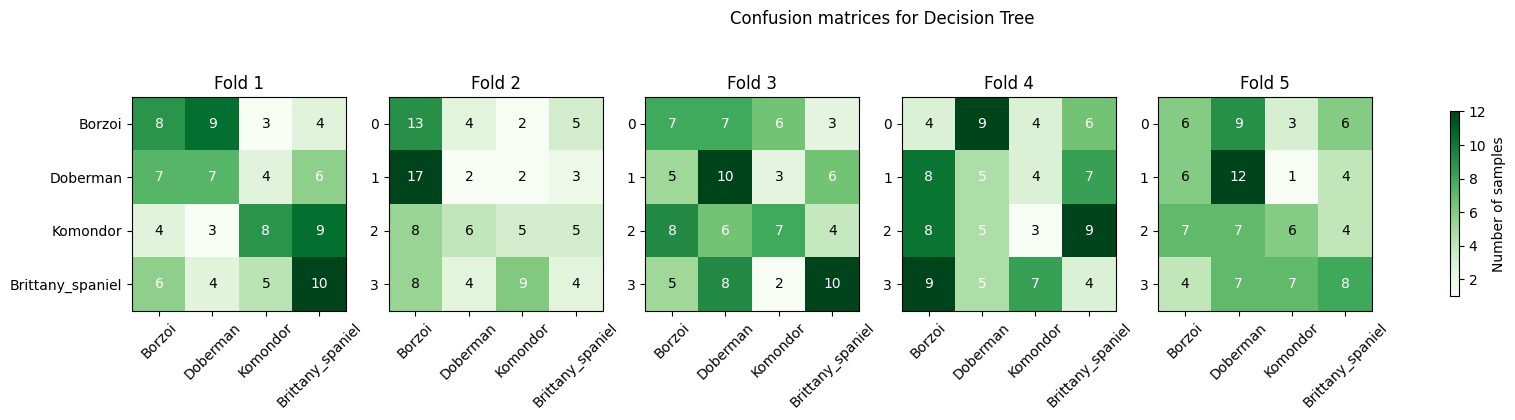

In [65]:
plot_confusion_matrix(decision_tree_cm,"Decision Tree",class_names)

In [68]:
print(f"Decision Tree mean accuracy accross all k folds is {np.mean(decision_tree_val_acc)}")

Decision Tree mean accuracy accross all k folds is 0.2865979381443299


In [55]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10, ))

In [61]:
mlp_cm, mlp_val_acc = train_clf_to_get_confusion_matrix(mlp_clf,scalled_x_train,y_train)

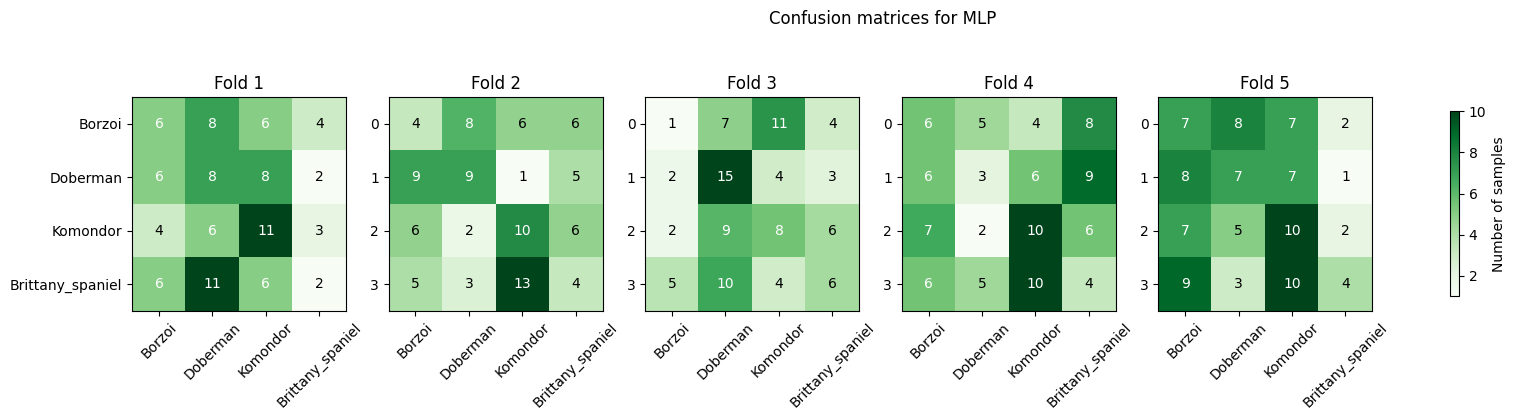

In [69]:
plot_confusion_matrix(mlp_cm,"MLP",class_names)

In [70]:
print(f"Neural Network mean accuracy accross all k folds is {np.mean(mlp_val_acc)}")

Neural Network mean accuracy accross all k folds is 0.27835051546391754


In [57]:
forest_clf = RandomForestClassifier()

In [58]:
forest_cm, forest_val_acc = train_clf_to_get_confusion_matrix(forest_clf,scalled_x_train,y_train)

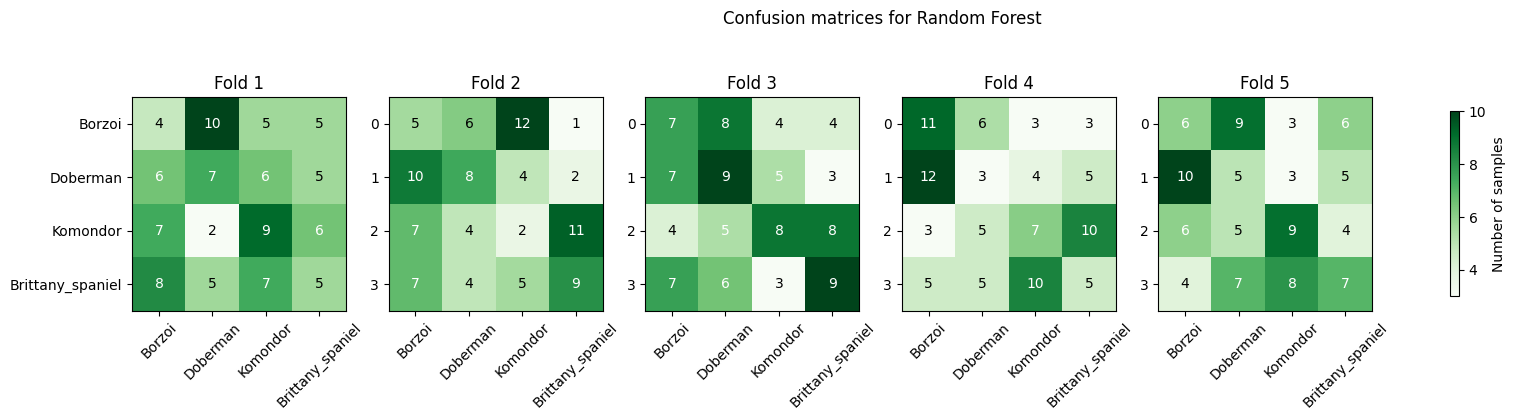

In [71]:
plot_confusion_matrix(forest_cm,"Random Forest",class_names)

In [72]:
print(f"random Forest mean accuracy accross all k folds is {np.mean(forest_val_acc)}")


random Forest mean accuracy accross all k folds is 0.27835051546391754


visually camparing from confusion matrix plot we can see that decision tree has the heighest values diagonally. so that is the best one (decision Tree)

based on mean validation accuracies decision tree is the best method with val acc = 0.2865979381443299

## 7 c,d

In [73]:
from sklearn.metrics import f1_score

In [75]:
def calculate_f1_score(clf,X_test,y_test):
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  f1_micro = f1_score(y_test, y_pred, average='micro')
  return f"Accuracy: {acc} and F1 score :{f1_micro}"


In [76]:
print("Decision Tree details ",calculate_f1_score(decision_tree_clf,scalled_x_test,y_test))

Decision Tree details  Accuracy: 0.3114754098360656 and F1 score :0.3114754098360656


In [77]:
print("Neural Netwrok details ",calculate_f1_score(mlp_clf,scalled_x_test,y_test))

Neural Netwrok details  Accuracy: 0.36885245901639346 and F1 score :0.36885245901639346


In [78]:
print("Random Forest details ",calculate_f1_score(forest_clf,scalled_x_test,y_test))


Random Forest details  Accuracy: 0.4098360655737705 and F1 score :0.4098360655737705


Random forest is best in both Test accuracy and F1 score